<a href="https://colab.research.google.com/github/20KMJ/ESAA7/blob/main/0526_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%BC%80%EB%9D%BC%EC%8A%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03 케라스(Keras)

# 04 | 모델 세부 설정

> mnist 데이터에 정규화를 처리한 후 입력 데이터를 준비하자.

In [12]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

11490434/11490434 [==============================] - 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


## 4-1 초기값 설정

레이어의 초기화 방법을 다르게 설정할 수 있다.

매개변수: `kernel_initializer`
1. 문자열 지정 방법
2. 클래스 인스턴스 지정 방법

초기화 목록
- 'glorot_normal', 'glorot_uniform' : 글로럿 초기화(Xavier 초기화)
- 'lecun_normal', 'lecun_uniform' : Yann Lecun 초기화
- 'he_normal', 'he_uniform' : He 초기화
- 'random_normal', 'random_uniform' : 정규 분포, 연속균등 분포 초기화

In [1]:
# 기본값 (Glorot Uniform 초기화)
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [2]:
# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}


In [3]:
# 클래스 인스턴스 초기화 (HeNormal 초기화)
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}


## 4-2 규제(Regularization)

매개변수: `kernel_regularizer`

종류: L1, L2 규제

In [4]:
# 기본값 (규제 None)
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
## L1 규제 적용

# 방법1
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 방법2: 클래스 인스턴스 적용. alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


## 4-3 드롭아웃(Dropout)

모델의 과대적합 문제를 해결하기 위해 사용

노드의 일부 신호를 임의로 삭제하게 되면, 모델이 쉽게 과대적합 되는 것을 방지할 수 있음 (모델이 학습하는 가중치 파라미터의 개수가 현저하게 줄어들기 때문)

훈련: 일부 노드 사용 (by 드롭아웃) / 예측: 모든 노드 사용

매개변수: `Dropout` = 노드에서 제거되는 비율

In [6]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## 4-4 배치 정규화(Batch Normalization)

각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화함. -> 안정적인 훈련 및 성능 향상

사용 방법: 클래스 인스턴스를 생성하여 추가하기

In [7]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

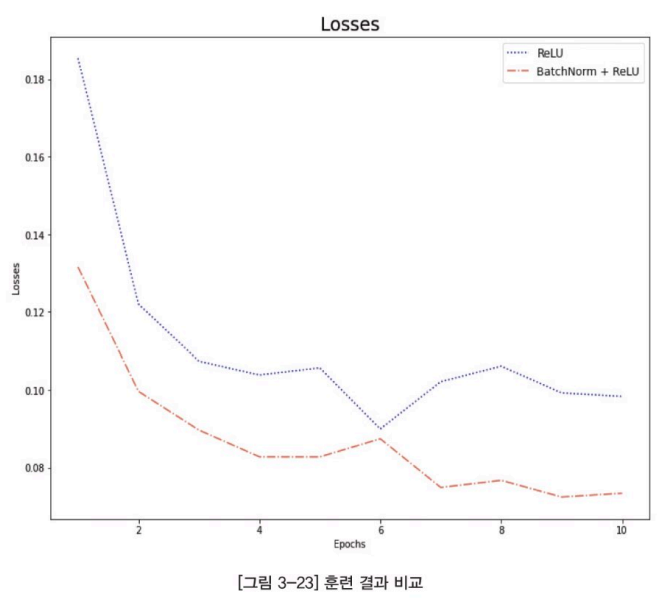

결론:

배치 정규화만 추가하였는데 손실을 이전 대비 더 안정적이고 빠르게 수렴함

더 크고 복잡한 데이터셋에 대해서는 배치 정규화 유무가 모델 성능에 크게 영향을 미치는 경우도 있으므로 배치 정규화를 적극 적용해 볼 필요가 있음

## 4-5 활성화(activation) 함수

> 클래스 인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용하기

In [9]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

> 활성화함수(LeakyReLU)를 모델에 적용하기

In [10]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model_c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

> 총 3개의 모델을 동일한 조건으로 10번의 epoch 동안 훈련한 후에 수렴 속도를 확인해보자

- model_a : Dense 레이어 + ReLU 활성화 함수
- model_b : Dense 레이어 + 배치 정규화
- model_c : Dense 레이어 + 배치 정규화 + LeakyReLU(0.2) 활성화 함수

In [13]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)
     

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2937 - accuracy: 0.9158 - val_loss: 0.1523 - val_accuracy: 0.9545
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1302 - accuracy: 0.9619 - val_loss: 0.1355 - val_accuracy: 0.9589
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0967 - accuracy: 0.9713 - val_loss: 0.0994 - val_accuracy: 0.9711
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9796 - val_loss: 0.1015 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0545 - accuracy: 0.9822 - val_loss: 0.0983 - val_accuracy: 0.9717
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9854 - val_loss: 0.1096 - val_accuracy

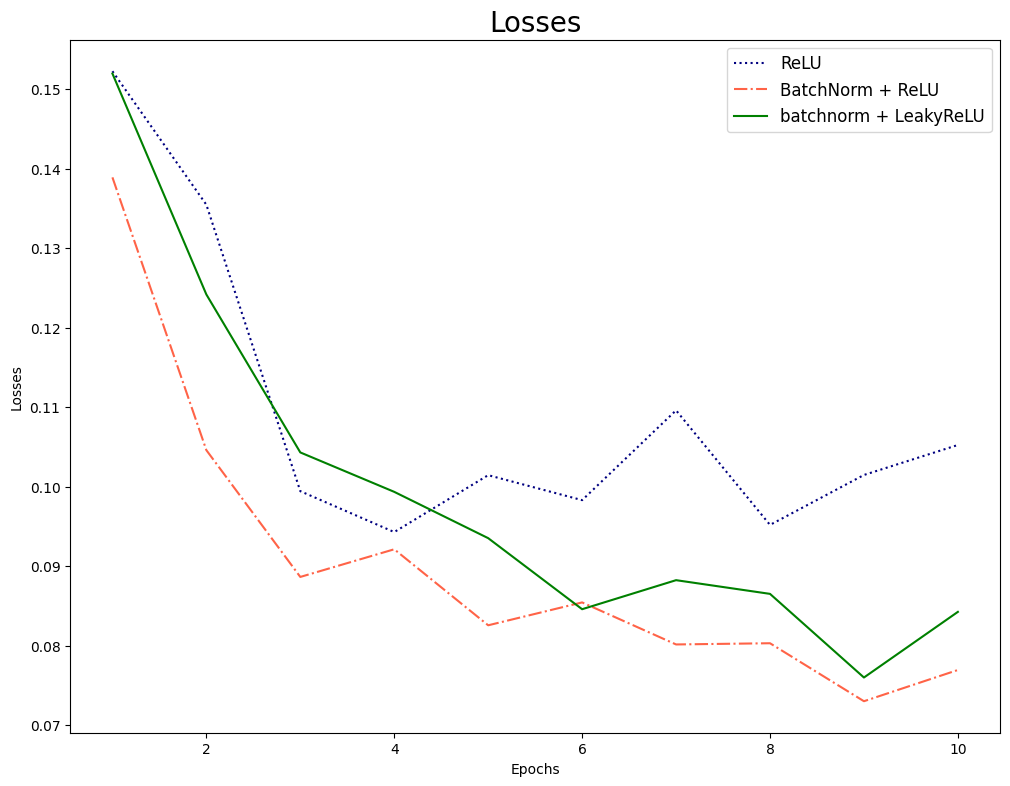

In [14]:
# epoch별 검증 손실의 감소 추이 확인하기

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()

결론:

mnist 데이터셋은 모델별 차이가 크지는 않다.

하지만 좀 더 복잡한 데이터셋을 다룬다면 배치 정규화와 다른 활성화 함수를 적용해 보면서 모델의 훈련 추이를 관찰해 볼 필요가 있다.

# 06 | 모델 저장 및 불러오기

In [15]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = 'tensorboard'

tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          epochs=10,
          callbacks=[tensorboard]
          )

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6216 - accuracy: 0.8300 - val_loss: 0.2941 - val_accuracy: 0.9155
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2611 - accuracy: 0.9249 - val_loss: 0.2201 - val_accuracy: 0.9351
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2031 - accuracy: 0.9412 - val_loss: 0.1801 - val_accuracy: 0.9478
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1668 - accuracy: 0.9515 - val_loss: 0.1565 - val_accuracy: 0.9549
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1416 - accuracy: 0.9588 - val_loss: 0.1384 - val_accuracy: 0.9583
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1223 - accuracy: 0.9645 - val_loss: 0.1284 - val_accuracy: 0.9618
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1072 - accuracy: 0.9692 - val_loss: 0.1148 - val

## 6-1 모델을 파일로 저장

`save()` 메소드를 사용하면 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있다.

모델이 저장되는 형식은 HDF5 포멧과 SavedModel 포맷 두 가지가 있다.

> HDF5 포맷으로 모델 저장하기

In [22]:
# HDF5 포맷
model.save("h5-model.h5")

## 6-2 저장된 모델 복원

`tensorflow.keras.models.load_model()`

In [23]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09677, acc: 0.97130


> SavedModel 포맷으로 모델 저장하기

In [26]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [27]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dense_19 (Dense)            (None, 64)                16448     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.09677, acc: 0.97130
saved_model] loss: 0.09677, acc: 0.97130


# 07 | 복잡한 모델 생성

## 7-1 함수형 API(Functional API)

함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있다.

Sequential API vs Functional API  
- Sequantial API: 여러 층을 시퀀스 형태로 연결. 단방향의 Sequential 모델만 구현할 수 있다는 제약이 존재함. 데이터 흐름이 특정 레이어를 건너뛰거나, 병합 및 분리하는 등의 구조의 모델을 구현할 수 없음  
- Functional API: 복잡한 구조의 모델을 정의

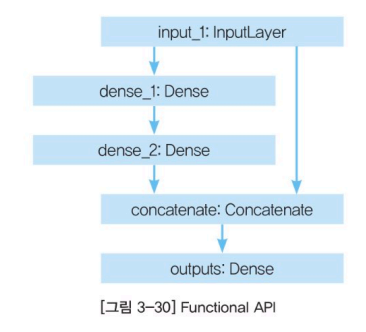

여러 개의 레이어를 마치 체인 구조로 입출력을 계속 연결할 수 있다.

레이어마다 name 매개변수로 이름을 부여할 수 있다. summary()로 요약 출력할 때 이름이 함께 출력된다.

In [29]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [30]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


구조 시각화(plot_model) 매개변수
- show_shapes = True: 데이터의 입출력 shape 출력
- show_layer_names = True: 레이어의 이름을 출력
- to_file: 이미지 파일로 저장 가능

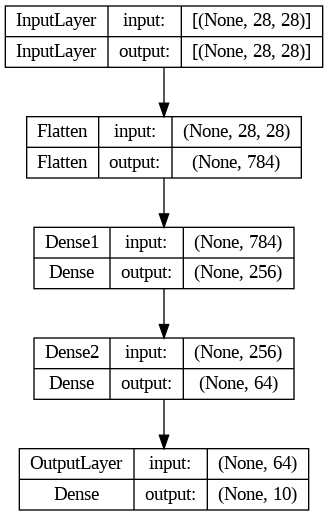

In [31]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [32]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2142 - accuracy: 0.9370
Epoch 2/3
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0887 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0612 - accuracy: 0.9798
Functional Model] loss: 0.07816, acc: 0.97470


## 7-2 모델 서브클래싱(Model Subclassing)

텐서플로 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있다.

이 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있다.

In [33]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [34]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_22 (Dense)            multiple                  200960    
                                                                 
 dense_23 (Dense)            multiple                  16448     
                                                                 
 dense_24 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2168 - accuracy: 0.9365
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0893 - accuracy: 0.9729
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0617 - accuracy: 0.9804
Subclassing Model] loss: 0.07472, acc: 0.97610


## 7-3 서브클래싱 모델 파라미터를 활용한 생성

Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점이다.

> 모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제

In [36]:
class MyModel(tf.keras.Model):
    
    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [37]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28))) # input shape를 지정하여 summary 사용 가능

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_25 (Dense)            multiple                  200960    
                                                                 
 dense_26 (Dense)            multiple                  16448     
                                                                 
 dense_27 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2123 - accuracy: 0.9375
Epoch 2/3
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0879 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0621 - accuracy: 0.9804
Subclassing Model w. parameters] loss: 0.07606, acc: 0.97540
